In [56]:
# ============================================================
# 💻 CUSTOMER CHURN PREDICTION — "Bye or Buy" (Gen Z Edition)
# ============================================================

# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import joblib
import graphviz
from sklearn import tree


In [57]:

# ============================================================
# 1️⃣ Data Creation — Synthetic but Realistic
# ============================================================

np.random.seed(42)
n = 1500  # More data = prettier plots

data = pd.DataFrame({
    'CustomerID': np.arange(1, n+1),
    'Age': np.random.randint(18, 70, n),
    'Tenure': np.random.randint(0, 10, n),
    'PlanType': np.random.choice(['Basic', 'Plus', 'Premium'], n),
    'MonthlyCharges': np.random.uniform(300, 1200, n).round(2),
    'SatisfactionScore': np.random.randint(1, 11, n),
    'CustomerSupportCalls': np.random.randint(0, 10, n),
    'DiscountUsage': np.random.randint(0, 6, n),
    'AppUsageHours': np.random.uniform(0.5, 8, n).round(1),
    'ComplaintFrequency': np.random.randint(0, 5, n),
    'SocialMediaEngagement': np.random.choice(['High', 'Medium', 'Low'], n),
})

# Logic for churn (higher chance if low satisfaction + high complaints)
data['Churn'] = np.where(
    (data['SatisfactionScore'] <= 4) &
    (data['CustomerSupportCalls'] > 3) &
    (data['ComplaintFrequency'] > 1),
    'Yes', 'No'
)

# Save CSV
data.to_csv('churn_data.csv', index=False)
print("✅ CSV file 'churn_data.csv' created successfully!")


✅ CSV file 'churn_data.csv' created successfully!


In [58]:

# ============================================================
# 2️⃣ Data Understanding
# ============================================================
print("\n--- DATA INFO ---")
print(data.info())




--- DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             1500 non-null   int64  
 1   Age                    1500 non-null   int32  
 2   Tenure                 1500 non-null   int32  
 3   PlanType               1500 non-null   object 
 4   MonthlyCharges         1500 non-null   float64
 5   SatisfactionScore      1500 non-null   int32  
 6   CustomerSupportCalls   1500 non-null   int32  
 7   DiscountUsage          1500 non-null   int32  
 8   AppUsageHours          1500 non-null   float64
 9   ComplaintFrequency     1500 non-null   int32  
 10  SocialMediaEngagement  1500 non-null   object 
 11  Churn                  1500 non-null   object 
dtypes: float64(2), int32(6), int64(1), object(3)
memory usage: 105.6+ KB
None


In [59]:
print("\n--- DATA DESCRIPTION ---")
print(data.describe())



--- DATA DESCRIPTION ---
        CustomerID          Age       Tenure  MonthlyCharges  \
count  1500.000000  1500.000000  1500.000000     1500.000000   
mean    750.500000    43.732000     4.513333      745.974853   
std     433.157015    15.071771     2.869258      258.295630   
min       1.000000    18.000000     0.000000      300.170000   
25%     375.750000    31.000000     2.000000      527.895000   
50%     750.500000    44.000000     4.000000      744.900000   
75%    1125.250000    56.000000     7.000000      973.357500   
max    1500.000000    69.000000     9.000000     1197.860000   

       SatisfactionScore  CustomerSupportCalls  DiscountUsage  AppUsageHours  \
count        1500.000000           1500.000000    1500.000000    1500.000000   
mean            5.496667              4.552667       2.398000       4.205667   
std             2.906709              2.930919       1.729043       2.108011   
min             1.000000              0.000000       0.000000       0.500000 

In [60]:
print("\n--- SAMPLE DATA ---")
print(data.head())



--- SAMPLE DATA ---
   CustomerID  Age  Tenure PlanType  MonthlyCharges  SatisfactionScore  \
0           1   56       4    Basic          314.23                  7   
1           2   69       9  Premium          369.43                 10   
2           3   46       3    Basic         1120.05                  2   
3           4   32       8  Premium          619.37                  4   
4           5   60       5    Basic          682.29                  9   

   CustomerSupportCalls  DiscountUsage  AppUsageHours  ComplaintFrequency  \
0                     5              5            6.4                   0   
1                     9              3            3.9                   3   
2                     1              0            6.4                   4   
3                     9              0            6.8                   3   
4                     3              5            5.4                   3   

  SocialMediaEngagement Churn  
0                   Low    No  
1      

In [61]:
print("\n--- NULL VALUES ---")
print(data.isnull().sum())



--- NULL VALUES ---
CustomerID               0
Age                      0
Tenure                   0
PlanType                 0
MonthlyCharges           0
SatisfactionScore        0
CustomerSupportCalls     0
DiscountUsage            0
AppUsageHours            0
ComplaintFrequency       0
SocialMediaEngagement    0
Churn                    0
dtype: int64


In [62]:
print("\n--- DATA TYPES ---")
print(data.dtypes)


--- DATA TYPES ---
CustomerID                 int64
Age                        int32
Tenure                     int32
PlanType                  object
MonthlyCharges           float64
SatisfactionScore          int32
CustomerSupportCalls       int32
DiscountUsage              int32
AppUsageHours            float64
ComplaintFrequency         int32
SocialMediaEngagement     object
Churn                     object
dtype: object


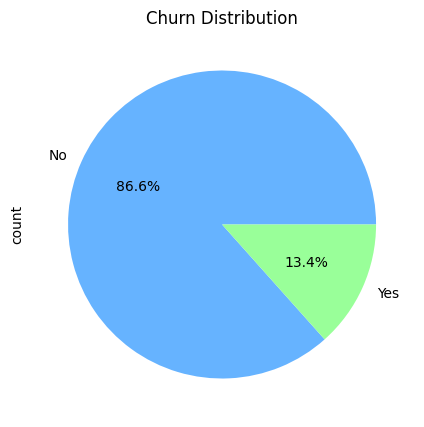

In [63]:

# ============================================================
# 3️⃣ Exploratory Data Analysis (EDA)
# ============================================================
plt.figure(figsize=(5,5))
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Churn Distribution')
plt.show()




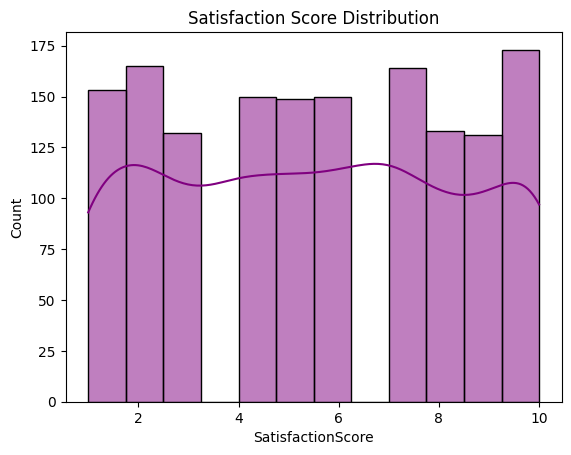

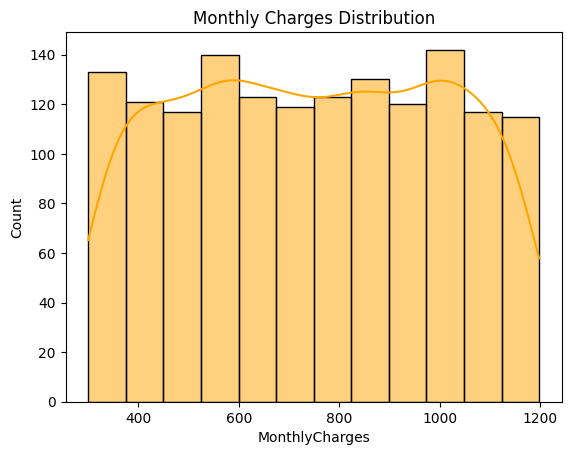

In [64]:

sns.histplot(data['SatisfactionScore'], kde=True, color='purple')
plt.title('Satisfaction Score Distribution')
plt.show()

sns.histplot(data['MonthlyCharges'], kde=True, color='orange')
plt.title('Monthly Charges Distribution')
plt.show()

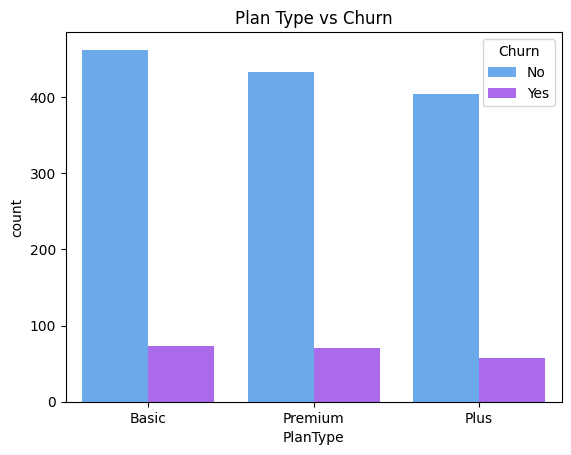

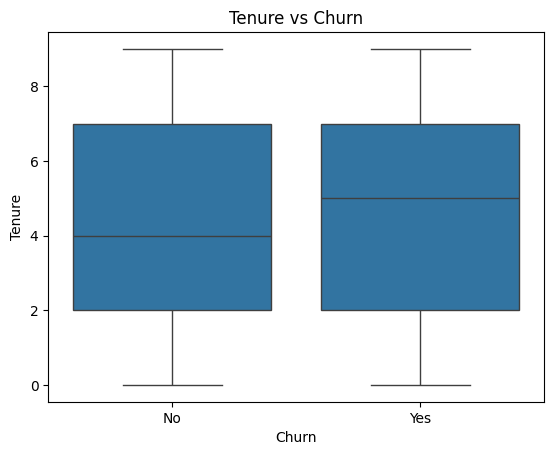

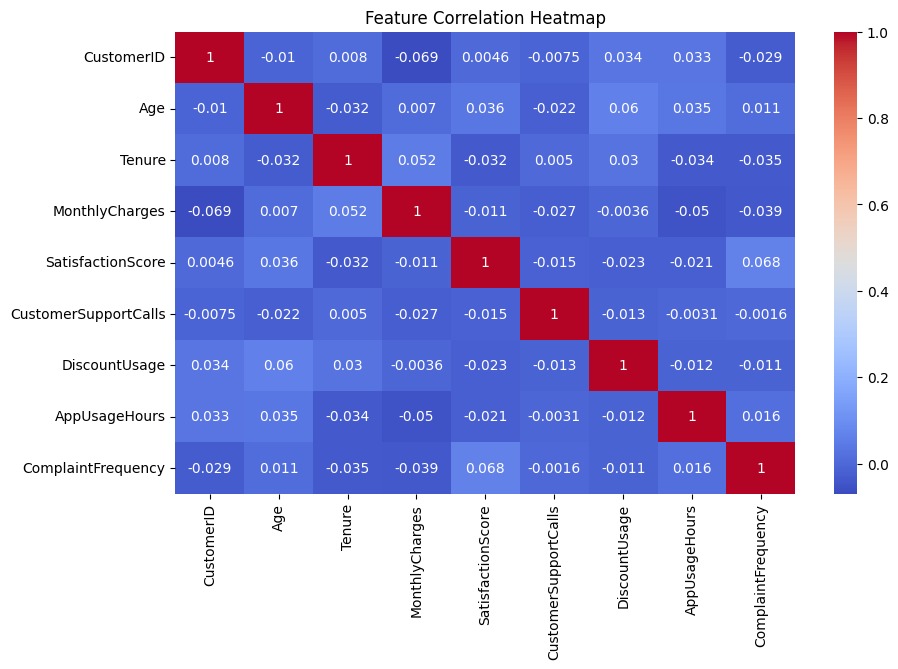

In [65]:

sns.countplot(x='PlanType', hue='Churn', data=data, palette='cool')
plt.title('Plan Type vs Churn')
plt.show()

sns.boxplot(x='Churn', y='Tenure', data=data)
plt.title('Tenure vs Churn')
plt.show()

# Correlation (numeric only)
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [66]:


data['TotalCharges'] = (data['Tenure'] * data['MonthlyCharges']).round(2)

# Separate encoders for each categorical column
encoders = {}

for col in ['PlanType', 'SocialMediaEngagement', 'Churn']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

# Scaling
scaler = StandardScaler()
scaled_cols = ['Age', 'Tenure', 'MonthlyCharges', 'SatisfactionScore',
               'CustomerSupportCalls', 'DiscountUsage', 'AppUsageHours',
               'ComplaintFrequency', 'TotalCharges']
data[scaled_cols] = scaler.fit_transform(data[scaled_cols])

joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoders, 'encoders.pkl')



['encoders.pkl']

In [67]:

# ============================================================
# 5️⃣ Train-Test Split
# ============================================================
X = data.drop(['CustomerID', 'Churn'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ============================================================
# 6️⃣ Model Building — Random Forest & XGBoost
# ============================================================
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

joblib.dump(rf_model, 'churn_rf_model.pkl')
joblib.dump(xgb_model, 'churn_xgb_model.pkl')
print("\n✅ Models saved: churn_rf_model.pkl & churn_xgb_model.pkl")



✅ Models saved: churn_rf_model.pkl & churn_xgb_model.pkl



====== Random Forest Evaluation ======
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00        40

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 1.000
ROC-AUC: 1.000


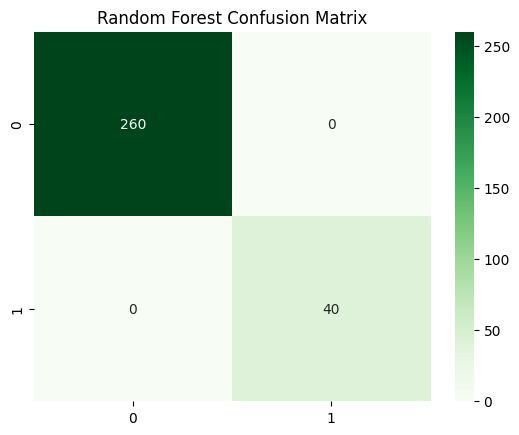


====== XGBoost Evaluation ======
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       260
           1       1.00      1.00      1.00        40

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 1.000
ROC-AUC: 1.000


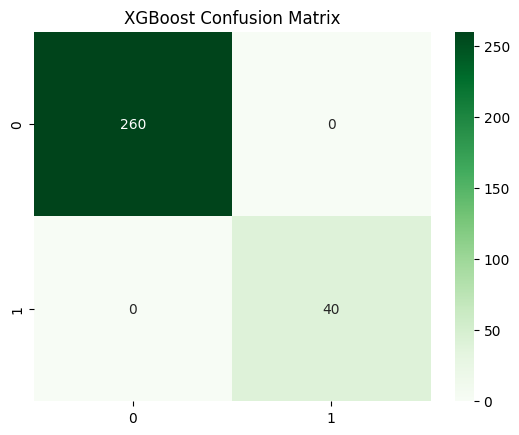

In [68]:

# ============================================================
# 7️⃣ Model Evaluation
# ============================================================
models = {'Random Forest': rf_model, 'XGBoost': xgb_model}

for name, model in models.items():
    print(f"\n====== {name} Evaluation ======")
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:,1]
    print(classification_report(y_test, preds))
    print(f"Accuracy: {accuracy_score(y_test, preds):.3f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, probs):.3f}")
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'{name} Confusion Matrix')
    plt.show()


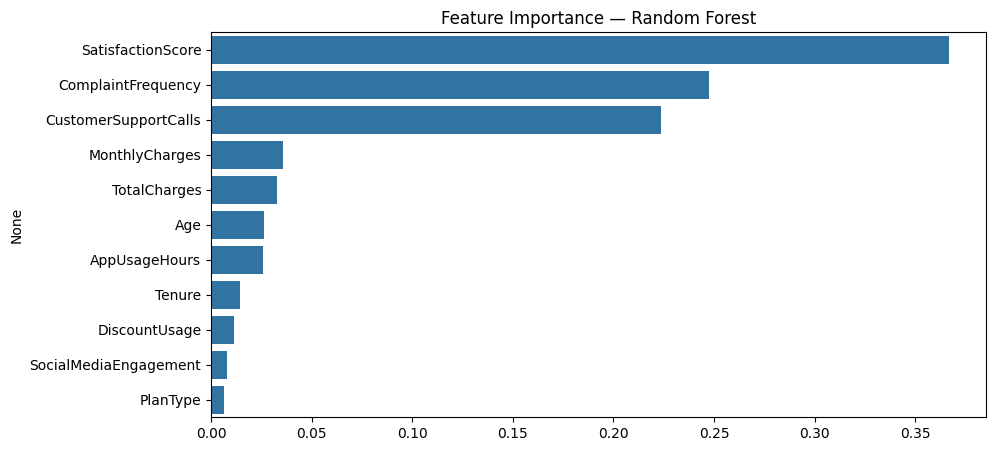

In [69]:

# Feature importance (Random Forest)
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importance — Random Forest')
plt.show()


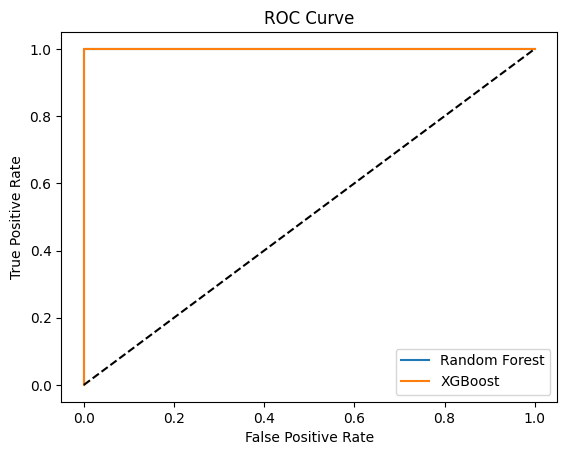

In [70]:

# ROC Curve
for name, model in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label=f'{name}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [71]:
# ============================================================
# 8️⃣ Retention Recommendation Engine (Fixed)
# ============================================================
# Load encoders again
encoders = joblib.load('encoders.pkl')

new_customer = pd.DataFrame({
    'Age':[25],
    'Tenure':[1],
    'PlanType':[encoders['PlanType'].transform(['Basic'])[0]],
    'MonthlyCharges':[500],
    'SatisfactionScore':[3],
    'CustomerSupportCalls':[6],
    'DiscountUsage':[1],
    'AppUsageHours':[1.2],
    'ComplaintFrequency':[3],
    'SocialMediaEngagement':[encoders['SocialMediaEngagement'].transform(['Low'])[0]],
    'TotalCharges':[1*500]
})

new_customer[scaled_cols] = scaler.transform(new_customer[scaled_cols])
prob = rf_model.predict_proba(new_customer)[:,1][0]
print("\n🧠 Predicted Churn Probability:", round(prob,3))

if prob > 0.8:
    print("⚠️ High churn risk! Offer loyalty perks or priority support.")
elif prob > 0.5:
    print("🟡 Medium risk. Suggest survey or personalized offer.")
else:
    print("🟢 Low risk. Keep maintaining engagement!")



🧠 Predicted Churn Probability: 0.88
⚠️ High churn risk! Offer loyalty perks or priority support.


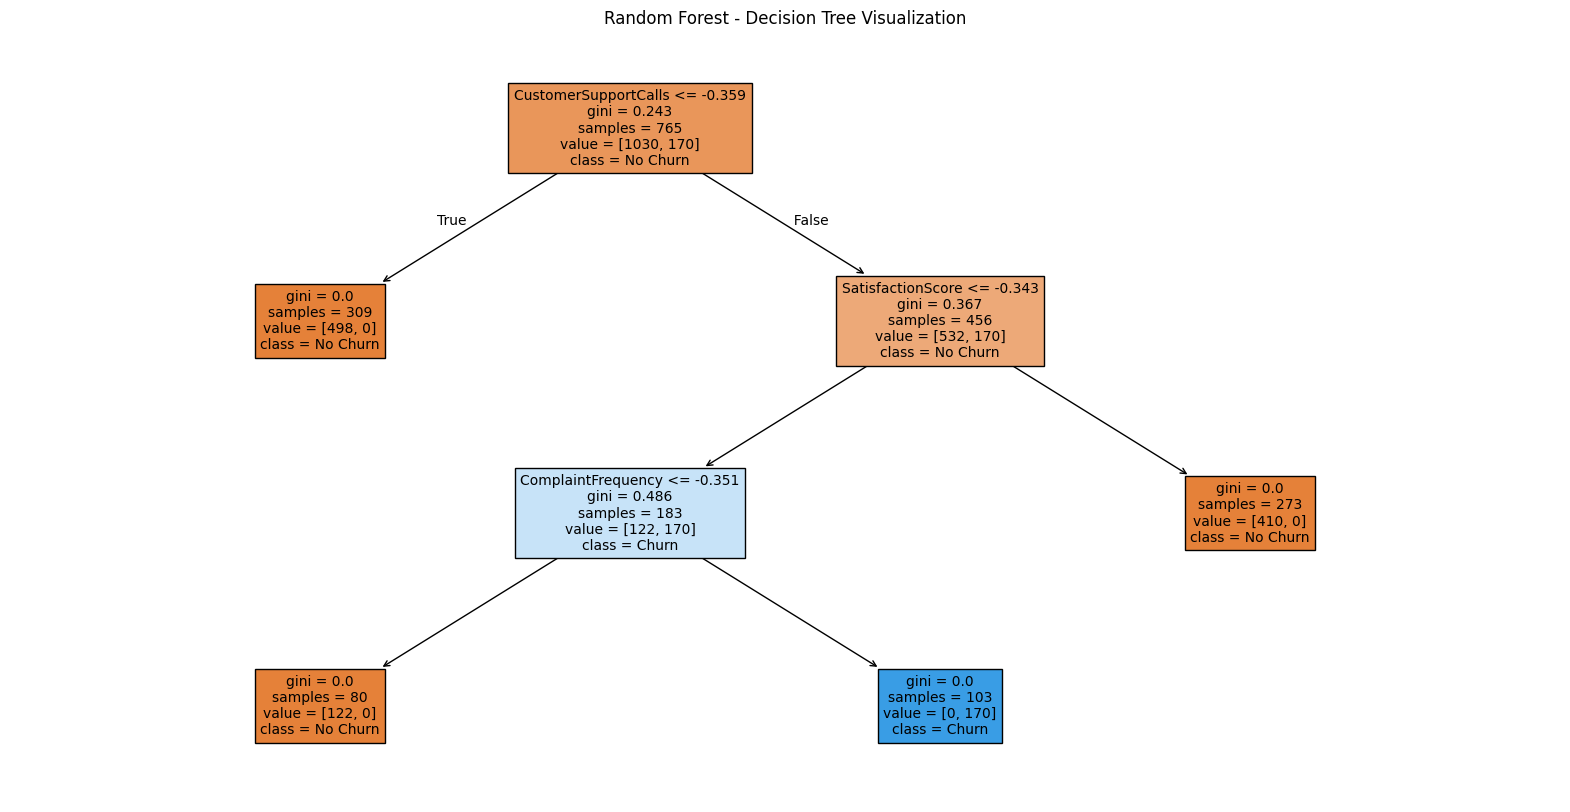

In [75]:
# Visualization of a single decision tree from Random Forest (without Graphviz)
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=X.columns,
          class_names=['No Churn', 'Churn'],
          filled=True,
          fontsize=10)
plt.title("Random Forest - Decision Tree Visualization")
plt.show()
